In [1]:
import io
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Conv2D, Dense
from keras.datasets import cifar10
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage.color import rgb2grey
%matplotlib inline

In [69]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [70]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [71]:
X = np.vstack((X_train,X_test))
y = np.vstack((y_train,y_test))

In [72]:
y = y.flatten()

In [73]:
X.shape, y.shape

((60000, 32, 32, 3), (60000,))

In [74]:
ind = [i for i,j in enumerate(y) if j == 8]

In [ ]:
len(ind)

In [75]:
X = X[ind]
y = y[ind]

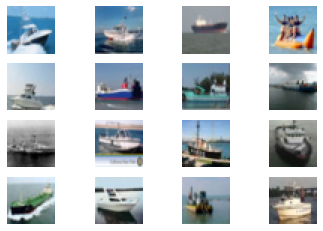

In [76]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [77]:
X.shape, y.shape

((6000, 32, 32, 3), (6000,))

In [78]:
X = X.reshape((6144000,3))
X.shape

(6144000, 3)

In [79]:
kmeans = KMeans(n_clusters=32,random_state=0)
kmeans = kmeans.fit(X)

In [80]:
kmeans.cluster_centers_

array([[224.88418722, 229.81684956, 233.36666586],
       [134.7784365 , 115.37175365,  97.76418347],
       [ 50.16694793,  52.53507085,  49.41039227],
       [140.42810181, 162.45602243, 183.75108283],
       [ 27.49654371,  50.89928495,  75.88306   ],
       [112.09054382, 122.23941334, 127.98351948],
       [182.98401223, 210.19756023, 233.12191782],
       [ 87.70322989, 123.1915388 , 156.74753391],
       [192.04443306, 193.93899281, 195.49108985],
       [ 80.250523  ,  88.54321165,  92.02189764],
       [212.42349955, 211.7797398 , 210.83994096],
       [ 29.85606203,  32.74529172,  35.13782858],
       [104.36845603,  88.57688547,  70.23505599],
       [156.36470429, 155.71901037, 153.71895747],
       [207.03244605, 183.06461526, 152.29065792],
       [100.66201338, 147.81147191, 194.0416249 ],
       [ 12.61557242,  12.78579752,  14.94323569],
       [246.82368922, 248.35893354, 248.1457824 ],
       [123.53474125, 142.30039996, 157.23289038],
       [ 72.52726544, 101.88644

In [81]:
X_new = X

In [82]:
X.shape

(6144000, 3)

In [83]:
for i in range(len(X)):
    X_new[i] = kmeans.cluster_centers_[kmeans.labels_[i]]

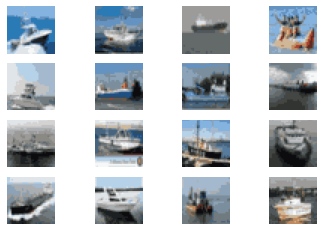

In [84]:
X_viz = X_new.reshape((6000,32,32,3))
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_viz[i]
    axis.imshow(arr)
    plt.axis('off')
plt.show()

In [85]:
from keras import utils as np_utils
y_N = keras.utils.np_utils.to_categorical(kmeans.labels_).reshape((6000,32,32,32))

In [86]:
X = X.reshape((6000,32,32,3))
X_N = []
for i in range(len(X)):
    X_N.append(rgb2grey(X[i]).tolist())
X_N = np.array(X_N)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  after removing the cwd from sys.path.


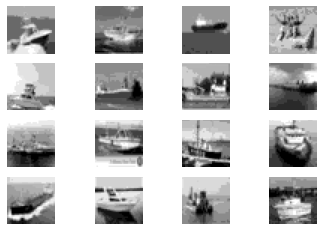

In [87]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_N[i]
    axis.imshow(arr,cmap='gray')
    plt.axis('off')
plt.show()

In [88]:
X_N.shape

(6000, 32, 32)

In [89]:
X_N = X_N.reshape((6000,32,32,1))
X_N.shape, y_N.shape

((6000, 32, 32, 1), (6000, 32, 32, 32))

In [90]:
X_train = X_N[0:5984]
y_train = y_N[0:5984]
X_test = X_N[-16:]
y_test = y_N[-16:]
X_train = np.vstack((X_train,X_test))
y_train = np.vstack((y_train,y_test))
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((6000, 32, 32, 1), (6000, 32, 32, 32), (16, 32, 32, 1), (16, 32, 32, 32))

In [91]:
cnn = Sequential()
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32,32,1)))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3,3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3,3), activation='relu', padding='same'))
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(32, activation='softmax'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        640       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        73792     
                                                                 
 dense_6 (Dense)             (None, 32, 32, 64)        4160      
                                                                 
 dense_7 (Dense)             (None, 32, 32, 32)       

Epoch 1/50
169/169 [==============================] - 9s 50ms/step - loss: 0.0280 - accuracy: 0.1727 - val_loss: 0.0248 - val_accuracy: 0.3127
Epoch 2/50
169/169 [==============================] - 8s 48ms/step - loss: 0.0221 - accuracy: 0.4308 - val_loss: 0.0191 - val_accuracy: 0.5469
Epoch 3/50
169/169 [==============================] - 8s 48ms/step - loss: 0.0175 - accuracy: 0.5897 - val_loss: 0.0145 - val_accuracy: 0.6699
Epoch 4/50
169/169 [==============================] - 8s 48ms/step - loss: 0.0190 - accuracy: 0.5724 - val_loss: 0.0159 - val_accuracy: 0.6611
Epoch 5/50
169/169 [==============================] - 8s 48ms/step - loss: 0.0158 - accuracy: 0.6647 - val_loss: 0.0150 - val_accuracy: 0.6782
Epoch 6/50
169/169 [==============================] - 8s 49ms/step - loss: 0.0143 - accuracy: 0.6962 - val_loss: 0.0160 - val_accuracy: 0.6536
Epoch 7/50
169/169 [==============================] - 8s 48ms/step - loss: 0.0133 - accuracy: 0.7145 - val_loss: 0.0172 - val_accuracy: 0.5847

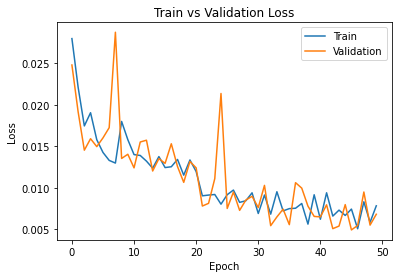

In [92]:
cnn.compile(loss='mean_squared_error', optimizer='adam', metrics = ['accuracy'])
history = cnn.fit(X_train, y_train, epochs=50, validation_split=0.1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [93]:
predictions = cnn.predict(X_test)
predictions.shape

(16, 32, 32, 32)

In [94]:
predictions = predictions.reshape((16384,32))
pred = predictions[:,0:3]
for i in range(len(predictions)):
    pred[i] = kmeans.cluster_centers_[np.argmax(predictions[i])].tolist()
pred = pred.reshape((16,32,32,3))

In [32]:
y_test.shape

(16, 32, 32, 12)

In [95]:
real = y_test.reshape((16384,32))
yy = real[:, 0:3]
for i in range(len(real)):
  yy[i] = kmeans.cluster_centers_[np.argmax(real[i])].tolist()
yy = yy.reshape((16,32,32,3))

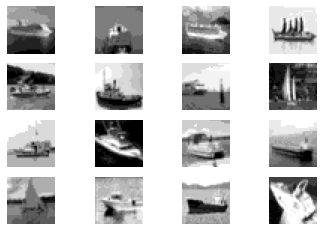

In [96]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = X_test.reshape(16,32,32)[i]
    axis.imshow(arr, cmap='gray')
    plt.axis('off')
plt.show()

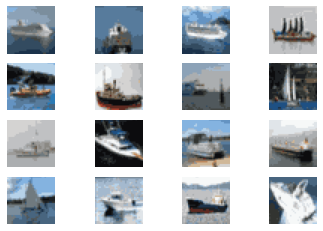

In [97]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = yy[i]
    axis.imshow(arr.astype(np.uint8))
    plt.axis('off')
plt.show()

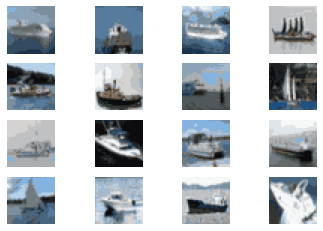

In [98]:
for i in range(0,16):
    axis = plt.subplot(4,4,i+1)
    arr = pred[i]
    axis.imshow(arr.astype(np.uint8))
    plt.axis('off')
plt.show()